# Lambda School Data Science Module 132
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
# import numpy for numbers work.
import numpy as np
# import chisquare from scipy.stats.
from scipy.stats import chisquare  # One-way chi square test

# chi square can take any crosstab/table and test the independence of rows/cols
# the null hypothesis is that the rows/cols are independent -> low chi square
# the alternative is that there is a dependence -> high chi square
# be aware! Chi square does *not* tell you direction/causation

# create a transverse array.
ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))
# crete a a transverse arrray.
dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# distribution tests:
# we often assume that something is normal, but it can be important to *check*

# for example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

# import normaltest from scipy.stats.
from scipy.stats import normaltest
# poisson models arrival times and is related to the binomial (coinflip).
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # pretty clearly not normal.

NormaltestResult(statistic=25.789300044777654, pvalue=2.5114506529442394e-06)


In [0]:
# kruskal-wallis h-test - compare the median rank between 2+ groups.
# can be applied to ranking decisions/outcomes/recommendations.
# The underlying math comes from chi-square distribution, and is best for n>5.
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

In [0]:
from scipy.stats import ttest_ind

?ttest_ind

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



## Central Limit Theorem



In [0]:
# create a random sample of 30 1 or 2 even probability.
np.random.binomial(n=1, p=.5, size=30)

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0])

In [0]:
# import numpy for numbers.
import numpy as np
# import matplotlib.pyplot for graphs.
import matplotlib.pyplot as plt
# import pandas library.
import pandas as pd

# create a function to return the sample means of the sample.
N = 1000
sample_means = []
for x in range(0,N):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

1000
[0.43333333333333335, 0.5666666666666667, 0.5333333333333333, 0.3333333333333333, 0.5333333333333333, 0.5, 0.4666666666666667, 0.4, 0.5, 0.36666666666666664, 0.6333333333333333, 0.5333333333333333, 0.43333333333333335, 0.4666666666666667, 0.26666666666666666, 0.36666666666666664, 0.5666666666666667, 0.5666666666666667, 0.4, 0.5666666666666667, 0.36666666666666664, 0.43333333333333335, 0.4666666666666667, 0.4, 0.4666666666666667, 0.5333333333333333, 0.5333333333333333, 0.36666666666666664, 0.5333333333333333, 0.4666666666666667, 0.5333333333333333, 0.4666666666666667, 0.4, 0.6333333333333333, 0.5333333333333333, 0.5666666666666667, 0.5333333333333333, 0.3333333333333333, 0.5333333333333333, 0.4666666666666667, 0.6, 0.5333333333333333, 0.5666666666666667, 0.4666666666666667, 0.3333333333333333, 0.43333333333333335, 0.4666666666666667, 0.5, 0.6666666666666666, 0.5333333333333333, 0.4, 0.5, 0.6, 0.5, 0.5, 0.43333333333333335, 0.4666666666666667, 0.5666666666666667, 0.5333333333333333,

In [0]:
# create dataframe with single coin flip.
df = pd.DataFrame({'one-samp': one_sample})
df.head()

,one-samp
0,1
1,1
2,0
3,0
4,0


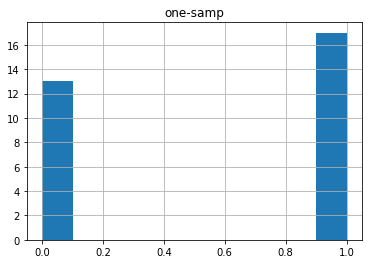

In [0]:
# plot histogram to look at distribution of a single coin flip. 
df.hist();

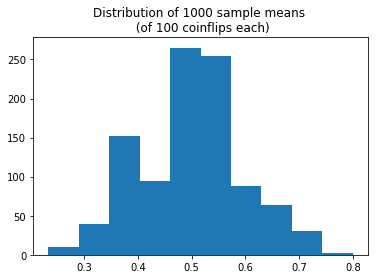

In [0]:
# plot histogram to look at distribution of all coin flips.
ax = plt.hist(sample_means)
plt.title(f'Distribution of {N} sample means \n (of 100 coinflips each)');

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

## Standard Error of the Mean

What does it mean to "estimate"? the Population mean?

In [0]:
# import numpy for numbers.
import numpy as np
# import pandas library.
import pandas as pd

# average height.
mu = 70
sigma = 3

# create a random sample based on 'average hieght'.
lambda_heights = np.random.normal(mu, sigma, 2000)
print(len(lambda_heights))
lambda_heights

2000


array([73.89421009, 69.43802032, 66.16775377, ..., 69.59506161,
       70.49542891, 66.4804134 ])

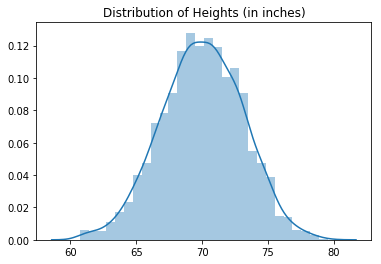

In [0]:
# import seaborn for graphs.
import seaborn as sns
# use distplot to graph the distribution of heights.
sns.distplot(lambda_heights)
plt.title('Distribution of Heights (in inches)');

In [0]:
# print the mean and standard deviation for lambda heights.
print("Population Mean:", lambda_heights.mean())
print("Population Standard Deviation:", lambda_heights.std())

Population Mean: 70.0034996225156
Population Standard Deviation: 3.0828981304503236


In [0]:
# look at all the lambda heights from the sample in its own data frame.
population = pd.DataFrame({'heights': lambda_heights})
print(population.shape)
population.head()

(2000, 1)


,heights
0,73.894210
1,69.438020
2,66.167754
3,67.550084
4,75.872439


In [0]:
# take a random sample and print sample mean.
sample1 = population.sample(100)
print(sample1.shape)
sample1.head()

(100, 1)


,heights
1131,66.483188
1864,71.762746
1995,67.143984
836,71.374484
1471,71.170943


In [0]:
print('Sample Mean #1:', sample1['heights'].mean())

Sample Mean #1: 69.85934357579353


In [0]:
# take a different random sample and print sample mean
sample2 = population.sample(100)
print(sample2.shape)
sample2.head()

(100, 1)


,heights
519,70.439476
754,74.313041
1005,68.429746
1840,72.442911
1572,67.193993


In [0]:
# show the 'mean' for 'hieghts' of sample2.
print('Sample Mean #2:', sample2['heights'].mean())

Sample Mean #2: 70.47581208112283


## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [0]:
# create a randmom sample of coin flips, 50/50 probability.
coinflips_10000 = np.random.binomial(n=1, p=0.5, size=10000)
# create th sample standard deviation.
sample_std = np.std(coinflips_10000)
print('Sample St Dev:', sample_std)
# create the sample size.
sample_size = len(coinflips_10000)
print('Sample Size:', sample_size)

Sample St Dev: 0.49999878999853586
Sample Size: 10000


In [0]:
# create the standard error for sample.
standard_error = sample_std/np.sqrt(sample_size)
print(standard_error)

0.004999987899985359


### What confidence level do we want our confidence interval to represent?

95% confidence Interval? 99% confidence interval? 

In [0]:
# import stats from scipy.stats.
import scipy.stats as stats
help(stats.t.ppf)

In [0]:
# set a %97.5 confidence interval.
t = stats.t.ppf(0.975, sample_size-1)
t

1.9602012636213575

In [0]:
# find the mean for the coinflips.
sample_mean = coinflips_10000.mean()
# find the confidence interval.
confidence_interval = (sample_mean - t*standard_error, sample_mean + t*standard_error)
#find the margin of error.
margin_of_error = t*standard_error

print("Sample Mean: ", sample_mean)
print("Margin of Error: ", margin_of_error)
print("Confidence Interval: ", confidence_interval)

Sample Mean:  0.5011
Margin of Error:  0.009800982599642799
Confidence Interval:  (0.4912990174003572, 0.5109009825996428)


## Graphically Represent a Confidence Interval

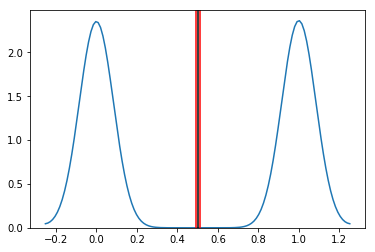

In [0]:
# import seaborn for graphs.
import seaborn as sns
# use kdeplot to show the coinflips data.
sns.kdeplot(coinflips_10000)
# plot the 'sample_mean' as blue 'k'.
plt.axvline(x=sample_mean, color='k')
# plot the low '0' confidence interval as red 'r'.
plt.axvline(x=confidence_interval[0], color='r')
# plot the high '1' confidence interval as red 'r'.
plt.axvline(x=confidence_interval[1], color='r')

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
# import ttest_1samp for 1 tail t-test.
from scipy.stats import t, ttest_1samp

In [0]:
# import numpy for numbers work.
import numpy as np

# create a list of all the coinflips in the loop.
coinflip_means = []
# create a list from 0 to 100.
for x in range(0,100):
# create a sample of size of 30, probability at .5, between 0 and 1.
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())
# print the list of 30 coinflips.
print(coinflip_means)

[0.5666666666666667, 0.36666666666666664, 0.4666666666666667, 0.3333333333333333, 0.5, 0.43333333333333335, 0.5, 0.43333333333333335, 0.6333333333333333, 0.4, 0.5666666666666667, 0.36666666666666664, 0.6, 0.5, 0.5333333333333333, 0.3333333333333333, 0.5333333333333333, 0.4666666666666667, 0.4666666666666667, 0.5, 0.5, 0.5333333333333333, 0.43333333333333335, 0.36666666666666664, 0.5333333333333333, 0.5666666666666667, 0.5, 0.4666666666666667, 0.26666666666666666, 0.6333333333333333, 0.36666666666666664, 0.5333333333333333, 0.4666666666666667, 0.3333333333333333, 0.5333333333333333, 0.5, 0.3333333333333333, 0.5666666666666667, 0.5666666666666667, 0.4666666666666667, 0.4666666666666667, 0.5333333333333333, 0.5333333333333333, 0.6333333333333333, 0.3333333333333333, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.4666666666666667, 0.5666666666666667, 0.36666666666666664, 0.36666666666666664, 0.5666666666666667, 0.5666666666666667, 0.4, 0.4666666666666667, 0.5333333333333333,

In [0]:
# show the man of the coinflips it total.
np.mean(coinflip_means)

0.488

In [0]:
import scipy.stats as stats
help(stats.t.interval)

Help on method interval in module scipy.stats._distn_infrastructure:

interval(alpha, *args, **kwds) method of scipy.stats._continuous_distns.t_gen instance
    Confidence interval with equal areas around the median.
    
    Parameters
    ----------
    alpha : array_like of float
        Probability that an rv will be drawn from the returned range.
        Each value should be in the range [0, 1].
    arg1, arg2, ... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        location parameter, Default is 0.
    scale : array_like, optional
        scale parameter, Default is 1.
    
    Returns
    -------
    a, b : ndarray of float
        end-points of range that contain ``100 * alpha %`` of the rv's
        possible values.



In [0]:
# 95% confidence interval.
# # create the t statistic at 95% confidence.
t_stat = stats.t.ppf(0.95, 99)
print('T Statistic: ', t_stat)
# create the standard deviation for the coinflips mean.
std_sample = np.std(coinflip_means)
# create the standard error for the coinflips mean.
std_err = std_sample/np.sqrt(len(coinflip_means))
# create the high and low confidence interval at 95%.
CI = stats.t.interval(0.95, 99, loc=np.mean(coinflip_means), scale=std_err)
print('95% confidence interval:', CI)

T Statistic:  1.6603911559963895
95% confidence interval: (0.47014155751303077, 0.5058584424869692)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [0]:
# t-test 1 sample.
ttest_1samp(coinflip_means, 0.48186)

Ttest_1sampResult(statistic=0.6787839183517913, pvalue=0.498858523055002)

A null hypothesis that's just outside of our confidence interval == reject



In [0]:
# t-test 1 sample.
ttest_1samp(coinflip_means, 0.51813)

Ttest_1sampResult(statistic=-3.330905449501553, pvalue=0.0012175073879266694)

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)



## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

In [0]:
import pandas as pd 

In [0]:
# read in the data set.
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
# show the data frame shape.
print(df.shape)
# show the data frame with headers.
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


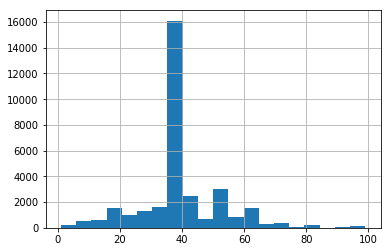

In [0]:
# plot hist with 'hours-per-week' column, in 20 bins.
df['hours-per-week'].hist(bins=20);

In [0]:
# look at the statistics info of the data, exclude will show non #s.
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [0]:
# create cut points to create groups for the 'hours-per-week-column'.
cut_points = [0, 9, 19, 29, 39, 49, 500]
# create label names for the cut points.
label_names = ['0-9','10-19','20-29','30-39','40-49','50+']
# create a new column for the new 'hours_per_week_groups', use pd.cut().
df['hours_per_week_groups'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)
# show the values for the new groups/column we created.
df.hours_per_week_groups.value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_groups, dtype: int64

In [0]:
# look at the value counts for 'sex' column.
df.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [0]:
# label and sor the 'hours_per_week_group' column.
df = df.sort_values(by='hours_per_week_groups')
# create a contingency table with cross tab for 'sex' and 'hours_per_week_group'
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_groups'], margins=True)
# show the new contingency table.
contingency_table

hours_per_week_groups,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [0]:
# create the sums for all the rows and columns.
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values

print(row_sums)
print(col_sums)

[10771 21790]
[  458  1246  2392  3667 18336  6462]


In [0]:
# create the total for 'All' row and 'All' column.
total = contingency_table.loc['All','All']
total

32561

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 6)
[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [0]:
observed = pd.crosstab(df['sex'], df['hours_per_week_categories']).values
print(observed.shape)
observed

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

In [0]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

2287.190943926107

## Run a $\chi^{2}$ Test using Scipy

In [0]:
help(stats.chi2_contingency)

In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

2287.190943926107 0.0 5 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


Null Hypothesis: Hours worked per week bins is **independent** of sex. 

Due to a p-value of 0, we REJECT the null hypothesis that hours worked per week and sex are independent, and conclude that there is an association between hours worked per week and sex. 

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):




In [0]:
# import pandas library.
import pandas as pd
# import numpy as np.
import numpy as np

In [0]:
# label and read the data file, set the '?'s to NaNs, 'header=None' to adjust the data frame.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', na_values='?', header=None,)
# rename the column headers.                
df.columns = df.columns=['party','handicapped-infants','water-project','budget','physician-fee-freeze', 'el-salvador-aid',
                        'religious-groups','anti-satellite-ban','aid-to-contras','mx-missile','immigration',
                        'synfuels', 'education', 'right-to-sue','crime','duty-free','south-africa']
# show the shape of the data frame.
print(df.shape)
# show the data frame with headers.
df.head()

In [0]:
# replace values for the 'n' with 0, 'y' with 1, 'democrat' with 1, 'republican' with 2.
df = df.replace({'n':0, 'y':1, 'republican':2, 'democrat':1})
# show the data frame with headers.
df.head()

In [0]:
# create a democratic 'dem' data frame.
dem = df[df.party == 1]
# create a republican 'rep' data frame.
rep = df[df.party == 2]

In [0]:
# create a sample set of data '30'.
sample = dem.sample(30)
sample_mean = sample.mean()
# fill NA's with the 'mean'.
sample = sample.fillna(sample_mean)
# show sample in a histrogram.
sample.hist(figsize=(20,12));

In [0]:
# show the sample data frame.
sample


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?


In [0]:
# set the 'sample for just the 'testing_feature'
sample = sample['immigration']
# show the 'sample1_feature' data with text & 'testing_feature'.
print('Sample', sample)

In [0]:
# create the 'mean'.
sample_mean = sample.mean()
# show the results.
print('Mean:', sample_mean)

In [0]:
# create the 'standard deviation' for 'sample1'.
sample_std_dev = np.std(sample)
# create the 'size' for 'sample1'.
sample_size = len(sample)
# create the 'standard error' for 'sample1'.
sample_std_error = sample_std_dev/np.sqrt(sample_size)
# show the results.
print('Standard Deviation:', sample_std_dev)
print('Size:', sample_size)
print('Standard Error:', sample_std_error)

In [0]:
# import scipy.stats library.
import scipy.stats as stats

In [0]:
# create the 't statistic' for 'sample1_feature_size'.
t = stats.t.ppf(0.975, sample_size-1)
# create the 'confidence interval'for the 'sample1_feature' data.
sample_ci = stats.t.interval(0.95, 99, loc=np.mean(sample_mean), scale=sample_std_error)
# show the 't statistic' & 'confidence interval' with text.
print('T Statistic:', t)
print('95% Confidence Interval:', sample_ci)

In [0]:
# import seaborn, matplotlib libraries.
import seaborn as sns
import matplotlib.pyplot as plt 

In [0]:
# show kdeplot graph.
sns.kdeplot(sample);
plt.axvline(x=sample_mean, color='k')
plt.axvline(x=sample_ci[0], color='r')
plt.axvline(x=sample_ci[1], color='r')

In [0]:
# show histogram graph.
plt.hist(sample)
plt.axvline(x=sample_mean, color='k')
plt.axvline(x=sample_ci[0], color='r')
plt.axvline(x=sample_ci[1], color='r')

In [0]:
# import scipy.stats 't', 'ttest_1samp' features.
from scipy.stats import t, ttest_1samp

In [0]:
# t-test 1 sample.
ttest_1samp(sample_mean, 0.30477)

•
### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# import numpy, chisquare from scipy.stats.
import numpy as np
from scipy.stats import chisquare
# show chisquare results for 'sample'.
print(chisquare(sample, axis=None))

In [0]:
# show the value counts for 'party'.
df['party'].value_counts()

In [0]:
# show the value counts for 'immigration'.
df['immigration'].value_counts()
df

In [0]:
# drop the NA's in the 'immigration' column.
df1 = df['immigration'].dropna()
df.sort_values(by='immigration')
# crosstab with 'party' & 'immigration'.
cont_table = pd.crosstab(df['party'], df['immigration'], margins=True)
# show the results.
cont_table

In [0]:
# show the data frame.
df1

### Excpected Value Count.

In [0]:
# create the sums for the rows & columns.
row_sums = cont_table.iloc[0:2, 2].values
col_sums = cont_table.iloc[2, 0:2].values
# show the results.
print(row_sums)

In [0]:
# create the total for 'All' & 'All'.
total = cont_table.loc['All','All']
# show results.
total

In [0]:
# create a loop to find the expected value count.
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
expected = np.array(expected)
# show the results.
print(expected.shape)
print(expected)

In [0]:
# drop the NA's in the 'immigration' column.
df2 = df['immigration'].dropna()
df2.value_counts()

In [0]:
# crosstab.
observed = pd.crosstab(df['party'], df2).values
# show the data frame shape.
print(observed.shape)
# show the data frame.
observed

In [0]:
# create the chi square.
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

In [0]:
# chisquared, pvalue, dof, expected.
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
# show results
print(chi_squared, p_value, dof, expected)

### Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)